<a href="https://colab.research.google.com/github/tesseract314/DS-Unit-1-Sprint-3-Data-Storytelling/blob/master/Copy_of_LS_DS_223_Make_explanatory_visualizations_LIVE_LESSON.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

_Lambda School Data Science_

# Make explanatory visualizations




Tody we will reproduce this [example by FiveThirtyEight:](https://fivethirtyeight.com/features/al-gores-new-movie-exposes-the-big-flaw-in-online-movie-ratings/)

In [2]:
from IPython.display import display, Image

url = 'https://fivethirtyeight.com/wp-content/uploads/2017/09/mehtahickey-inconvenient-0830-1.png'
example = Image(url=url, width=400)

display(example)

Using this data: https://github.com/fivethirtyeight/data/tree/master/inconvenient-sequel

Objectives
- add emphasis and annotations to transform visualizations from exploratory to explanatory
- remove clutter from visualizations

Links
- [Strong Titles Are The Biggest Bang for Your Buck](http://stephanieevergreen.com/strong-titles/)
- [Remove to improve (the data-ink ratio)](https://www.darkhorseanalytics.com/blog/data-looks-better-naked)
- [How to Generate FiveThirtyEight Graphs in Python](https://www.dataquest.io/blog/making-538-plots/)

## Make prototypes

This  helps us understand the problem

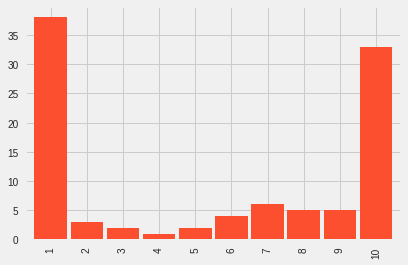

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


plt.style.use('fivethirtyeight')

fake = pd.Series([38, 3, 2, 1, 2, 4, 6, 5, 5, 33], 
                 index=range(1,11)) # Make index start at 1 instead of 0

fake.plot.bar(color='C1', width=0.9); # 'color' makes bars one color, 'width' controls bar width
#fake
#list(range(1,11)) # 11 not included

In [0]:
# List of all styles you can use with matplotlib
#plt.style.available

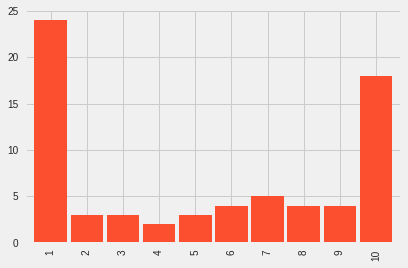

In [5]:
# Putting ratings directly into the series
fake2 = pd.Series(
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
     2, 2, 2, 
     3, 3, 3,
     4, 4,
     5, 5, 5,
     6, 6, 6, 6,
     7, 7, 7, 7, 7,
     8, 8, 8, 8,
     9, 9, 9, 9, 
     10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10])

fake2.value_counts().sort_index().plot.bar(color='C1', width=0.9);

## Annotate with text

In [6]:
# Taking a look at the graph again to see how to recreate the annotations
display(example)

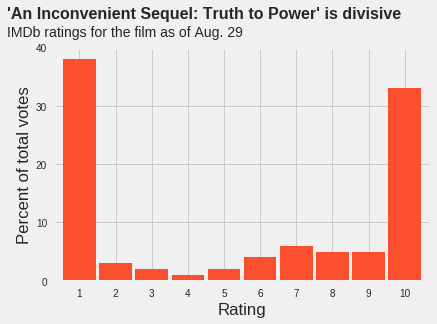

In [7]:
plt.style.use('fivethirtyeight') # Set style

# Use first method of creating a series
fake = pd.Series([38, 3, 2, 1, 2, 4, 6, 5, 5, 33], 
                 index=range(1,11))

# Creating an object (ax) with the bar plot of 'fake' series
ax = fake.plot.bar(color='C1', width=0.9)

# Rotating x tick numbers to be right-side-up
ax.tick_params(labelrotation=0)

# Comment out ax.set for title, because we want to use as.text for title instead
#ax.set(title="'An Inconvenient Sequel: Truth to Power' is Divisive")

# Using ax.text to set graph title, position of title, font size, and weight
ax.text(x=-2, y=45, s="'An Inconvenient Sequel: Truth to Power' is divisive",
       fontsize=16, fontweight='bold')

# Using ax.text again to create a subtitle
ax.text(x=-2, y=42, s='IMDb ratings for the film as of Aug. 29')

# Using ax.set for x label, y label and y-axis tick mark range and interval
ax.set(xlabel='Rating', ylabel='Percent of total votes', yticks=range(0, 50, 10));

## Reproduce with real data

In [0]:
# Creating a dataframe with actual IMDb data that 538 aggregated
df = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/inconvenient-sequel/ratings.csv')

In [9]:
df.shape

(80053, 27)

In [10]:
# Looking at how many datapoints are in df by unpacking df.shape and multiplying
# rows and columns
width, height = df.shape
width * height

2161431

In [11]:
# Changing pandas options so we can see all the columns 
pd.options.display.max_columns = 500
df.head()

,timestamp,respondents,category,link,average,mean,median,1_votes,2_votes,3_votes,4_votes,5_votes,6_votes,7_votes,8_votes,9_votes,10_votes,1_pct,2_pct,3_pct,4_pct,5_pct,6_pct,7_pct,8_pct,9_pct,10_pct
0,2017-07-17 12:28:32.785639,402,Males,http://www.imdb.com/title/tt6322922/ratings-male,4.6,5.0,2,197,7,7,3,7,7,11,8,20,135,49.0,1.7,1.7,0.7,1.7,1.7,2.7,2.0,5.0,33.6
1,2017-07-17 12:28:33.025600,78,Females,http://www.imdb.com/title/tt6322922/ratings-fe...,6.9,7.7,10,16,1,0,1,1,0,3,4,3,49,20.5,1.3,0.0,1.3,1.3,0.0,3.8,5.1,3.8,62.8
2,2017-07-17 12:28:33.273919,4,Aged under 18,http://www.imdb.com/title/tt6322922/ratings-age_1,4.2,4.2,3,2,0,0,0,1,0,0,0,0,1,50.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,25.0
3,2017-07-17 12:28:33.495325,4,Males under 18,http://www.imdb.com/title/tt6322922/ratings-ma...,4.2,4.2,3,2,0,0,0,1,0,0,0,0,1,50.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,25.0
4,2017-07-17 12:28:33.722849,130,Aged 18-29,http://www.imdb.com/title/tt6322922/ratings-age_2,6.3,6.5,9,41,0,3,1,2,3,6,4,6,64,31.5,0.0,2.3,0.8,1.5,2.3,4.6,3.1,4.6,49.2


In [12]:
display(example)

In [13]:
# transposing df to get a quick view of all the columns
df.sample(1).T

,8134
timestamp,2017-08-03 15:50:05.646877
respondents,33
category,Top 1000 voters
link,http://www.imdb.com/title/tt6322922/ratings-to...
average,4.7
mean,4.8
median,5
1_votes,9
2_votes,3
3_votes,2


In [14]:
# Describing timestampt column -- it doesn't appear to be in datetime format
df.timestamp.describe()

count                          80053
unique                         80053
top       2017-08-07 05:30:04.542971
freq                               1
Name: timestamp, dtype: object

In [0]:
# Making timestamp column datetime format
df.timestamp = pd.to_datetime(df.timestamp)

In [16]:
# Now we see the first and last dates of the column
df.timestamp.describe()

count                          80053
unique                         80053
top       2017-07-24 23:00:02.760781
freq                               1
first     2017-07-17 12:28:32.785639
last      2017-08-29 23:10:06.218251
Name: timestamp, dtype: object

In [0]:
# Turning the timestamp column into the index
df = df.set_index('timestamp')

In [18]:
# Seeing that the index is changed
df['2017-08-29']

,respondents,category,link,average,mean,median,1_votes,2_votes,3_votes,4_votes,5_votes,6_votes,7_votes,8_votes,9_votes,10_votes,1_pct,2_pct,3_pct,4_pct,5_pct,6_pct,7_pct,8_pct,9_pct,10_pct
timestamp,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-08-29 00:00:02.248882,1682,Males,http://www.imdb.com/title/tt6322922/ratings-male,5.3,5.3,6,671,50,29,12,42,79,107,90,83,519,39.9,3.0,1.7,0.7,2.5,4.7,6.4,5.4,4.9,30.9
2017-08-29 00:00:02.499363,257,Females,http://www.imdb.com/title/tt6322922/ratings-fe...,6.9,7.3,10,53,3,4,4,4,5,14,13,26,131,20.6,1.2,1.6,1.6,1.6,1.9,5.4,5.1,10.1,51.0
2017-08-29 00:00:02.727204,15,Aged under 18,http://www.imdb.com/title/tt6322922/ratings-age_1,4.5,5.3,5,7,0,0,0,1,0,1,0,0,6,46.7,0.0,0.0,0.0,6.7,0.0,6.7,0.0,0.0,40.0
2017-08-29 00:00:03.024270,13,Males under 18,http://www.imdb.com/title/tt6322922/ratings-ma...,5.3,5.9,7,5,0,0,0,1,0,1,0,0,6,38.5,0.0,0.0,0.0,7.7,0.0,7.7,0.0,0.0,46.2
2017-08-29 00:00:03.248207,2,Females under 18,http://www.imdb.com/title/tt6322922/ratings-fe...,1.0,1.0,1,2,0,0,0,0,0,0,0,0,0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-08-29 00:00:03.441529,450,Aged 18-29,http://www.imdb.com/title/tt6322922/ratings-age_2,6.4,6.6,8,117,3,6,7,17,24,35,28,23,190,26.0,0.7,1.3,1.6,3.8,5.3,7.8,6.2,5.1,42.2
2017-08-29 00:00:03.636825,402,Males Aged 18-29,http://www.imdb.com/title/tt6322922/ratings-ma...,6.3,6.5,8,112,3,4,6,15,20,33,25,21,163,27.9,0.7,1.0,1.5,3.7,5.0,8.2,6.2,5.2,40.5
2017-08-29 00:00:03.839446,41,Females Aged 18-29,http://www.imdb.com/title/tt6322922/ratings-fe...,7.1,7.9,10,4,0,2,1,2,2,2,3,2,23,9.8,0.0,4.9,2.4,4.9,4.9,4.9,7.3,4.9,56.1
2017-08-29 00:00:04.030663,771,Aged 30-44,http://www.imdb.com/title/tt6322922/ratings-age_3,5.6,5.6,7,287,21,12,4,21,36,53,38,49,250,37.2,2.7,1.6,0.5,2.7,4.7,6.9,4.9,6.4,32.4


In [19]:
# Looking at all categories in 'category' column
df.category.value_counts()

Males                 4216
Females Aged 45+      4216
Females               4216
Males Aged 30-44      4216
Females Aged 18-29    4216
Males Aged 18-29      4216
Aged under 18         4216
US users              4216
Aged 45+              4216
IMDb users            4216
Aged 30-44            4216
Aged 18-29            4216
Top 1000 voters       4216
IMDb staff            4216
Females Aged 30-44    4216
Non-US users          4216
Males under 18        4216
Males Aged 45+        4216
Females under 18      4165
Name: category, dtype: int64

In [20]:
# Looking at rows that have category as 'IMDb users'
df[df.category =='IMDb users']

,respondents,category,link,average,mean,median,1_votes,2_votes,3_votes,4_votes,5_votes,6_votes,7_votes,8_votes,9_votes,10_votes,1_pct,2_pct,3_pct,4_pct,5_pct,6_pct,7_pct,8_pct,9_pct,10_pct
timestamp,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-07-17 12:28:36.697246,678,IMDb users,http://www.imdb.com/title/tt6322922/ratings,4.9,5.4,5,304,14,8,5,9,10,18,24,30,256,44.8,2.1,1.2,0.7,1.3,1.5,2.7,3.5,4.4,37.8
2017-07-17 12:34:21.250099,678,IMDb users,http://www.imdb.com/title/tt6322922/ratings,4.9,5.4,5,304,14,8,5,9,10,18,24,30,256,44.8,2.1,1.2,0.7,1.3,1.5,2.7,3.5,4.4,37.8
2017-07-17 13:00:06.506688,678,IMDb users,http://www.imdb.com/title/tt6322922/ratings,4.9,5.4,5,304,14,8,5,9,10,18,24,30,256,44.8,2.1,1.2,0.7,1.3,1.5,2.7,3.5,4.4,37.8
2017-07-17 14:00:06.727742,679,IMDb users,http://www.imdb.com/title/tt6322922/ratings,4.9,5.3,5,305,14,8,5,9,10,18,24,30,256,44.9,2.1,1.2,0.7,1.3,1.5,2.7,3.5,4.4,37.7
2017-07-17 15:00:06.055125,679,IMDb users,http://www.imdb.com/title/tt6322922/ratings,4.9,5.3,5,305,14,8,5,9,10,18,24,30,256,44.9,2.1,1.2,0.7,1.3,1.5,2.7,3.5,4.4,37.7
2017-07-17 16:00:06.023053,679,IMDb users,http://www.imdb.com/title/tt6322922/ratings,4.9,5.3,5,305,14,8,5,9,10,18,24,30,256,44.9,2.1,1.2,0.7,1.3,1.5,2.7,3.5,4.4,37.7
2017-07-17 17:00:06.142993,679,IMDb users,http://www.imdb.com/title/tt6322922/ratings,4.9,5.3,5,305,14,8,5,9,10,18,24,30,256,44.9,2.1,1.2,0.7,1.3,1.5,2.7,3.5,4.4,37.7
2017-07-17 18:00:06.510891,680,IMDb users,http://www.imdb.com/title/tt6322922/ratings,4.9,5.3,5,306,14,8,5,9,10,18,24,30,256,45.0,2.1,1.2,0.7,1.3,1.5,2.6,3.5,4.4,37.6
2017-07-17 19:00:06.666467,680,IMDb users,http://www.imdb.com/title/tt6322922/ratings,4.9,5.3,5,306,14,8,5,9,10,18,24,30,256,45.0,2.1,1.2,0.7,1.3,1.5,2.6,3.5,4.4,37.6


In [0]:
# Making dataframe with just rows that are on the last day
lastday = df['2017-08-29']

In [22]:
# Using the condition on the lastday dataframe
lastday[lastday.category=='IMDb users']

,respondents,category,link,average,mean,median,1_votes,2_votes,3_votes,4_votes,5_votes,6_votes,7_votes,8_votes,9_votes,10_votes,1_pct,2_pct,3_pct,4_pct,5_pct,6_pct,7_pct,8_pct,9_pct,10_pct
timestamp,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-08-29 00:00:06.288486,2646,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1020,67,39,24,55,107,152,145,144,893,38.5,2.5,1.5,0.9,2.1,4.0,5.7,5.5,5.4,33.7
2017-08-29 00:10:06.763461,2646,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1020,67,39,24,55,107,152,145,144,893,38.5,2.5,1.5,0.9,2.1,4.0,5.7,5.5,5.4,33.7
2017-08-29 00:20:05.745307,2646,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1020,67,39,24,55,107,152,145,144,893,38.5,2.5,1.5,0.9,2.1,4.0,5.7,5.5,5.4,33.7
2017-08-29 00:30:05.818552,2646,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1020,67,39,24,55,107,152,145,144,893,38.5,2.5,1.5,0.9,2.1,4.0,5.7,5.5,5.4,33.7
2017-08-29 00:40:06.180928,2646,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1020,67,39,24,55,107,152,145,144,893,38.5,2.5,1.5,0.9,2.1,4.0,5.7,5.5,5.4,33.7
2017-08-29 00:50:05.826082,2646,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1020,67,39,24,55,107,152,145,144,893,38.5,2.5,1.5,0.9,2.1,4.0,5.7,5.5,5.4,33.7
2017-08-29 01:00:05.483262,2646,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1020,67,39,24,55,107,152,145,144,893,38.5,2.5,1.5,0.9,2.1,4.0,5.7,5.5,5.4,33.7
2017-08-29 01:10:06.038644,2646,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1020,67,39,24,55,107,152,145,144,893,38.5,2.5,1.5,0.9,2.1,4.0,5.7,5.5,5.4,33.7
2017-08-29 01:20:05.807155,2646,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1020,67,39,24,55,107,152,145,144,893,38.5,2.5,1.5,0.9,2.1,4.0,5.7,5.5,5.4,33.7


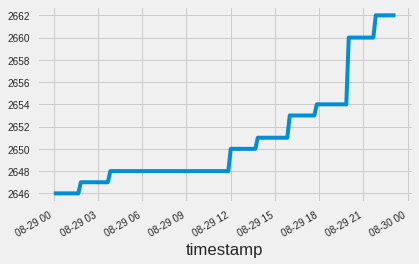

In [23]:
# Plotting the above to see that the number of respondents is cumulative
lastday[lastday.category=='IMDb users'].respondents.plot();

In [24]:
# Respondents is cumulative, so all we need is the last row
df.tail(1)

,respondents,category,link,average,mean,median,1_votes,2_votes,3_votes,4_votes,5_votes,6_votes,7_votes,8_votes,9_votes,10_votes,1_pct,2_pct,3_pct,4_pct,5_pct,6_pct,7_pct,8_pct,9_pct,10_pct
timestamp,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-08-29 23:10:06.218251,2662,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1021,69,38,25,55,110,154,147,146,897,38.4,2.6,1.4,0.9,2.1,4.1,5.8,5.5,5.5,33.7


In [0]:
# Creating dataframe with just the last row of df
final = df.tail(1)

In [26]:
columns = [str(i) + '_pct' for i in range(1,11)] # Creating columns variable with list comprehension to get only the columns we need

final[columns] # Telling final dataframe to only consider the above columns list

,1_pct,2_pct,3_pct,4_pct,5_pct,6_pct,7_pct,8_pct,9_pct,10_pct
timestamp,,,,,,,,,,
2017-08-29 23:10:06.218251,38.4,2.6,1.4,0.9,2.1,4.1,5.8,5.5,5.5,33.7


In [0]:
# Transposing the dataframe because it's easier to chart that way/more intuative
data = final[columns].T

In [0]:
# replacing the index with a list of integers from 1 to 10
data.index = range(1,11)

In [29]:
# Looking at new dataframe
data

timestamp,2017-08-29 23:10:06.218251
1,38.4
2,2.6
3,1.4
4,0.9
5,2.1
6,4.1
7,5.8
8,5.5
9,5.5
10,33.7


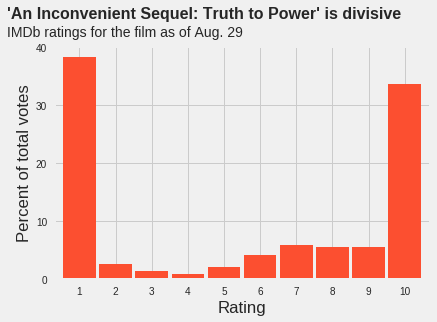

In [30]:
#data.plot.bar();


# Bringing code from above examples down to use on actual 538 data
plt.style.use('fivethirtyeight')

# Simply replaced 'fake' with 'data'
ax = data.plot.bar(color='C1', width=0.9, legend=False) 

ax.tick_params(labelrotation=0)

#ax.set(title="'An Inconvenient Sequel: Truth to Power' is Divisive")

ax.text(x=-2, y=45, s="'An Inconvenient Sequel: Truth to Power' is divisive",
       fontsize=16, fontweight='bold')

ax.text(x=-2, y=42, s='IMDb ratings for the film as of Aug. 29')

ax.set(xlabel='Rating', ylabel='Percent of total votes', yticks=range(0, 50, 10));



# ASSIGNMENT

Replicate the lesson code. I recommend that you [do not copy-paste](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit).

# STRETCH OPTIONS

#### Reproduce another example from [FiveThityEight's shared data repository](https://data.fivethirtyeight.com/).

If you aren't sure what to choose, try:
- the chart titled ["Men dominated Al Gore's IMDb movie rating"](https://fivethirtyeight.com/features/al-gores-new-movie-exposes-the-big-flaw-in-online-movie-ratings/)
- or the tutorial, [How to Generate FiveThirtyEight Graphs in Python](https://www.dataquest.io/blog/making-538-plots/)

Other options include:
- [thanksgiving-2015](https://fivethirtyeight.com/features/heres-what-your-part-of-america-eats-on-thanksgiving/) (try the [`altair`](https://altair-viz.github.io/gallery/index.html#maps) library)
- [candy-power-ranking](https://fivethirtyeight.com/features/the-ultimate-halloween-candy-power-ranking/) (try the [`statsmodels`](https://www.statsmodels.org/stable/index.html) library)
- or another example of your choice!

#### Make more charts!

Choose a chart you want to make, from [FT's Visual Vocabulary poster](http://ft.com/vocabulary).

Find the chart in an example gallery of a Python data visualization library:
- [Seaborn](http://seaborn.pydata.org/examples/index.html)
- [Altair](https://altair-viz.github.io/gallery/index.html)
- [Matplotlib](https://matplotlib.org/gallery.html)
- [Pandas](https://pandas.pydata.org/pandas-docs/stable/visualization.html)

Reproduce the chart. [Optionally, try the "Ben Franklin Method."](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit) If you want, experiment and make changes.

Take notes. Consider sharing your work with your cohort!









In [31]:
import matplotlib.pyplot as plt
import fix_yahoo_finance as yf


data = yf.download('^GSPC','1950-01-03','2019-01-22')

[*********************100%***********************]  1 of 1 downloaded


In [65]:
data.head(30)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1950-01-03,16.660000,16.660000,16.660000,16.660000,16.660000,1260000
1950-01-04,16.850000,16.850000,16.850000,16.850000,16.850000,1890000
1950-01-05,16.930000,16.930000,16.930000,16.930000,16.930000,2550000
1950-01-06,16.980000,16.980000,16.980000,16.980000,16.980000,2010000
1950-01-09,17.080000,17.080000,17.080000,17.080000,17.080000,2520000
1950-01-10,17.030001,17.030001,17.030001,17.030001,17.030001,2160000
1950-01-11,17.090000,17.090000,17.090000,17.090000,17.090000,2630000
1950-01-12,16.760000,16.760000,16.760000,16.760000,16.760000,2970000
1950-01-13,16.670000,16.670000,16.670000,16.670000,16.670000,3330000


In [74]:
data.iloc[:21, [0]].mean()

Open    16.875714
dtype: float64

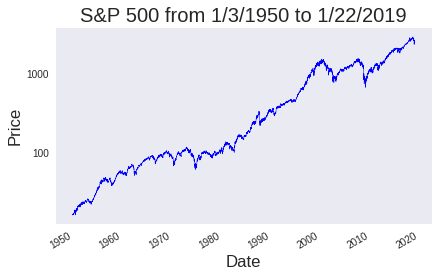

In [40]:
import matplotlib.ticker
plt.style.use('seaborn-dark')
ax = data['Close'].plot.line(color='b', linewidth=.5, logy=True)

ax.set(title="S&P 500 from 1/3/1950 to 1/22/2019")

ax.set(xlabel='Date', ylabel='Price')
ax.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())

ax;

In [0]:
data.index = pd.to_datetime(data.index, infer_datetime_format=True)

DatetimeIndex(['1950-01-03', '1950-01-04', '1950-01-05', '1950-01-06',
               '1950-01-09'],
              dtype='datetime64[ns]', name='Date', freq=None)

In [63]:
from datetime import date

test_date = date(1954, 1, 3)


def recessions(input_date):
  if date(1953, 7, 1) >= input_date <= date(1954, 5, 31):
    return 5000
  else:
    return 0
  
recessions(test_date)

0

In [64]:
data['Recession'] = data.apply(recessions)

TypeError: ignored

In [0]:
#help(data['Close'].plot)
#plt.style.available
#help(matplotlib.ticker.ScalarFormatter)